In [1]:
# import libraries which are needed to perfom data cleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# r is used to undo the error of ':' in path
df = pd.read_csv(r"train.csv")

df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check for null columns
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# try to fill null if applicable
df.Age.describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

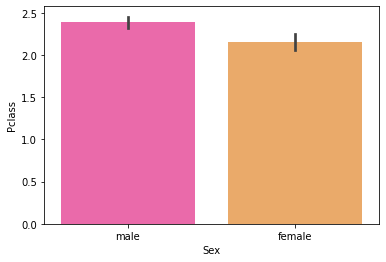

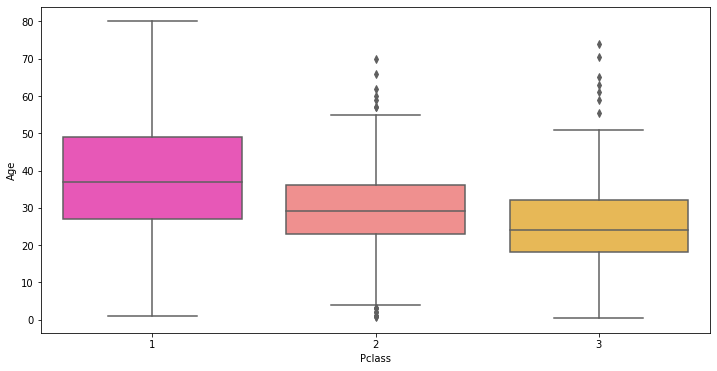

In [4]:
plt.figure()
sns.barplot(x='Sex',y='Pclass',data=df,palette='spring')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass',y='Age',data=df,palette='spring')


In [5]:
m3 = df.query('Pclass == 3 & Sex == "male"')["Age"].mean()
f3 = df.query('Pclass == 3 & Sex == "female"')["Age"].mean()
m2 = df.query('Pclass == 2 & Sex == "male"')["Age"].mean()
f2 = df.query('Pclass == 2 & Sex == "female"')["Age"].mean()
m1 = df.query('Pclass == 1 & Sex == "male"')["Age"].mean()
f1 = df.query('Pclass == 1 & Sex == "female"')["Age"].mean()


def fill_age(x):
    
    Age = x[0]
    Pclass = x[1]
    Sex = x[2]
    
    if pd.isnull(Age):

        if Pclass == 1 and Sex == "male":
            return m1
        elif Pclass == 1 and Sex == "female":
            return m1
        elif Pclass == 2 and Sex == "male":
            return m2
        elif Pclass == 2 and Sex == "female":
            return f2
        elif Pclass == 3 and Sex == "male":
            return m3
        else:
            return round(f3)

    else:
        return Age

#df['Age'] = df[['Age','Pclass','Sex']].apply(fill_age,axis=1)
df['Age']=df['Age'].fillna(30)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop('Cabin',axis=1,inplace=True)

df.dropna(inplace=True)

df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

df = pd.concat([df,sex,embark],axis=1)
df.drop(['PassengerId'],axis=1,inplace=True)

combine = df.copy()

combine["Title"] = combine["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

combine["Title"].value_counts()


Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Don           1
Sir           1
Countess      1
Jonkheer      1
Lady          1
Ms            1
Capt          1
Name: Title, dtype: int64

In [9]:
combine["Title"] = combine["Title"].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combine["Title"] = combine["Title"].replace('Mlle', 'Miss')
combine["Title"] = combine["Title"].replace('Ms', 'Miss')
combine["Title"] = combine["Title"].replace('Mme', 'Mrs')
combine["Title"].value_counts()


Mr        517
Miss      184
Mrs       125
Master     40
Rare       21
Major       2
Name: Title, dtype: int64

In [10]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    
combine["Title"] = combine["Title"].map(title_mapping)
combine.head()


,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S,Title
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0,3.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1,3.0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,1.0


In [11]:
combine.drop("Name",axis=1,inplace = True)

combine.drop("Fare",axis=1,inplace = True)

combine


,Survived,Pclass,Age,SibSp,Parch,male,Q,S,Title
0,0,3,22.0,1,0,1,0,1,1.0
1,1,1,38.0,1,0,0,0,0,3.0
2,1,3,26.0,0,0,0,0,1,2.0
3,1,1,35.0,1,0,0,0,1,3.0
4,0,3,35.0,0,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,0,1,5.0
887,1,1,19.0,0,0,0,0,1,2.0
888,0,3,30.0,1,2,0,0,1,2.0
889,1,1,26.0,0,0,1,0,0,1.0
